In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
#generate a cluster of random points centered around a chosen central point
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X, y = datasets.make_blobs(n_pts, random_state=123, centers=centers, cluster_std=0.4)
#print(X)
#print(y)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(n_pts, 1))

In [3]:
def scartter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

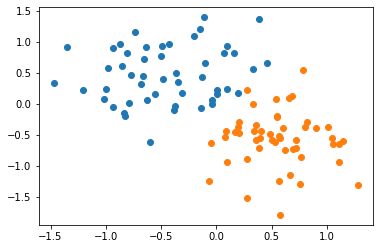

In [4]:
scartter_plot()

In [5]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.linear = nn.Linear(input_size, output_size) 
        #returns a linear outcome, in this case: return [x1, x2] x [w1, w2]^T + [b1]
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x)) #transformed to probability 1/(1+e^x)
        return pred
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else: return 0

In [6]:
torch.manual_seed(2)
model = Model(2, 1) # two weights, one outcome => y = w1*x1 + w2*x2 + b => 0 = w1x1 + w2x2 + b1
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [7]:
[w, b] = model.parameters()
print(w, b)
w1, w2 = w.view(2)
b1 = b[0]
print(w1, w2, b1)
def get_params():
    return (w1.item(), w2.item(), b[0].item())

Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True) Parameter containing:
tensor([0.1939], requires_grad=True)
tensor(0.1622, grad_fn=<SelectBackward>) tensor(-0.1683, grad_fn=<SelectBackward>) tensor(0.1939, grad_fn=<SelectBackward>)


In [8]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    #0 = w1x1 + w2x2 + b1, linear equation
    #theoretically, prediction for all points above the line is 1 
    #and 0 for all points below this line in a perfet model
    x1 = np.array([-2.0, 2.0]) # interval for the line x coordinates
    x2 = (-w1*x1-b1)/w2 # corresponding value for point on the line
    plt.plot(x1, x2, 'r')
    scartter_plot()

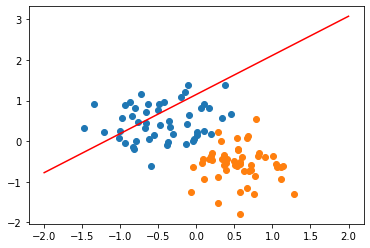

In [9]:
plot_fit('Initial Model')

In [10]:
criterion = nn.BCELoss() #Binary Cross-Entropy Loss, aka Sigmoid Cross-Entropy loss
optimizer = torch.optim.SGD(model.parameters() ,lr=0.01)

In [11]:
epochs = 100000
losses = []
for i in range(epochs):
    if ((i+1) % (epochs/100) == 0):
        print (int(((i+1) / epochs) * 100), '%', "Loss =", loss.item())
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    #print("epoch", i, "loss", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

1 % Loss = 0.2562711238861084
2 % Loss = 0.18405593931674957
3 % Loss = 0.15133805572986603
4 % Loss = 0.1318747103214264
5 % Loss = 0.11863123625516891
6 % Loss = 0.10887020081281662
7 % Loss = 0.10128509253263474
8 % Loss = 0.09516576677560806
9 % Loss = 0.09008923172950745
10 % Loss = 0.0857861340045929
11 % Loss = 0.08207566291093826
12 % Loss = 0.0788315162062645
13 % Loss = 0.07596219331026077
14 % Loss = 0.07339975237846375
15 % Loss = 0.07109243422746658
16 % Loss = 0.0689999982714653
17 % Loss = 0.06709065288305283
18 % Loss = 0.0653388723731041
19 % Loss = 0.06372395157814026
20 % Loss = 0.062228746712207794
21 % Loss = 0.06083909049630165
22 % Loss = 0.05954299122095108
23 % Loss = 0.058330461382865906
24 % Loss = 0.05719263479113579
25 % Loss = 0.0561223179101944
26 % Loss = 0.055112987756729126
27 % Loss = 0.05415908992290497
28 % Loss = 0.053255610167980194
28 % Loss = 0.052398499101400375
30 % Loss = 0.05158373713493347
31 % Loss = 0.050808053463697433
32 % Loss = 0.0500

Text(0.5, 0, 'Epoch')

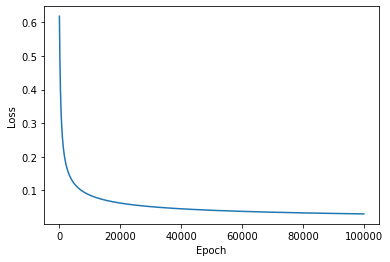

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

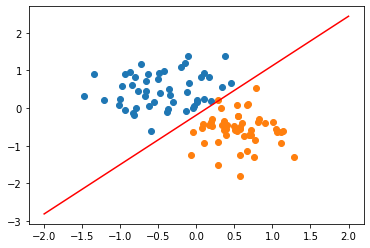

In [13]:
plot_fit("Trained Model")

Red point positive probability = 0.9999997615814209
Black point positive probability = 2.0298303482491065e-08
Red point in class 1
Black point in class 0


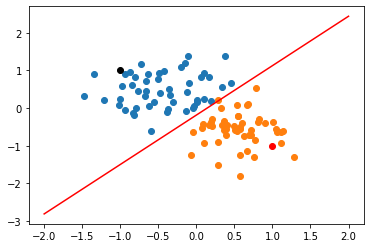

In [14]:
point1 = torch.Tensor([-0.5.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))

print("Red point in class {}".format(model.predict(point1)))
print("Black point in class {}".format(model.predict(point2)))
plot_fit('Trained Model')